## Final plots for report

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import os
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

## 1. Aggregate Data

In [3]:
nyse_data_path = '../rejection/nyse-o/compare_100/'
sp1 = '../rejection/sp500/compare_1/'
sp5 = '../rejection/sp500/compare_5/'
sp100 = '../rejection/sp500/compare_100-bad/'

## 1.1 NYSE

In [4]:
files = os.listdir(nyse_data_path)
files

['Compare_100_2018-01-18 00:32:31',
 'Compare_100_2018-01-17 23:17:58',
 'Compare_100_2018-01-18 01:17:40',
 'Compare_100_2018-01-17 23:35:41',
 'Compare_100_2018-01-17 20:34:47',
 'Compare_100_2018-01-18 01:10:55',
 'Compare_100_2018-01-17 23:13:38',
 'Compare_100_2018-01-17 22:39:53',
 'Compare_100_2018-01-17 20:01:05',
 'Compare_100_2018-01-17 22:58:08',
 'Compare_100_2018-01-17 23:35:42']

In [5]:
dfs = []

for f in files:
    df = pd.read_csv(nyse_data_path + f)
    dfs.append(df)
    
nyse_data = pd.concat(dfs, axis=0, ignore_index=True)
nyse_data= nyse_data.drop(columns=['Unnamed: 0'])

nyse_data['Wealth Difference'] =  nyse_data['Wealth'] - nyse_data['No Risk Wealth']
nyse_data['Wealth prop diff'] =  (nyse_data['Wealth'] - nyse_data['No Risk Wealth']) / nyse_data['No Risk Wealth']
nyse_data['Wealth prop diff'] = nyse_data['Wealth prop diff'] * 100

In [6]:
# all_data.head(10)
nyse_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03
mean,101.067273,0.203045,0.003646,0.771455,0.974727,23.240022,1.666299e+01,6.577029e+00,5.874941e+06
std,81.697967,0.128961,0.003530,0.457933,0.289351,11.329711,1.095889e+01,9.767410e+00,1.492137e+08
min,21.000000,0.000000,0.000000,0.000000,0.500000,0.000140,1.888940e-07,-2.176420e+01,-4.493513e+01
25%,42.000000,0.100000,0.001000,0.400000,0.750000,15.051585,1.084368e+01,7.552359e-11,2.831727e-10
50%,63.000000,0.200000,0.002500,0.800000,1.000000,26.598582,1.416210e+01,4.203695e+00,3.649187e+01
75%,126.000000,0.300000,0.005000,1.200000,1.250000,26.749613,2.021331e+01,1.302029e+01,1.127740e+02
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+09


## 1.2 S&P

In [7]:
files100 = os.listdir(sp100)
files5 = os.listdir(sp5)
files1 = os.listdir(sp1)
files = files100 + files1 + files5
print(len(files))

524


In [8]:
dfs = []

for f in files100:
    df = pd.read_csv(sp100 + f)
    dfs.append(df)
    
for f in files1:
    df = pd.read_csv(sp1 + f)
    dfs.append(df)
    
all_data = pd.concat(dfs, axis=0, ignore_index=True)
all_data = all_data.drop(columns=['Unnamed: 0'])

all_data['Wealth Difference'] =  all_data['Wealth'] - all_data['No Risk Wealth']
all_data['Wealth prop diff'] =  (all_data['Wealth'] - all_data['No Risk Wealth']) / all_data['No Risk Wealth']

all_data.describe()
sp500_data = all_data.copy()

## 2 Basic visualization

## 2.1 Difference in wealth vs. beta

In [9]:
nyse_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03
mean,101.067273,0.203045,0.003646,0.771455,0.974727,23.240022,1.666299e+01,6.577029e+00,5.874941e+06
std,81.697967,0.128961,0.003530,0.457933,0.289351,11.329711,1.095889e+01,9.767410e+00,1.492137e+08
min,21.000000,0.000000,0.000000,0.000000,0.500000,0.000140,1.888940e-07,-2.176420e+01,-4.493513e+01
25%,42.000000,0.100000,0.001000,0.400000,0.750000,15.051585,1.084368e+01,7.552359e-11,2.831727e-10
50%,63.000000,0.200000,0.002500,0.800000,1.000000,26.598582,1.416210e+01,4.203695e+00,3.649187e+01
75%,126.000000,0.300000,0.005000,1.200000,1.250000,26.749613,2.021331e+01,1.302029e+01,1.127740e+02
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+09


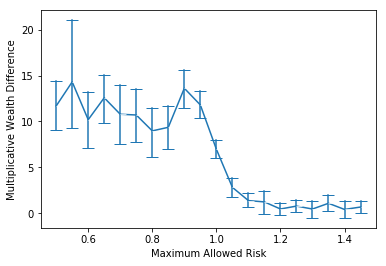

In [10]:
matplotlib.rcParams.update({'errorbar.capsize': 6})
fig = sns.lineplot(x='Max Risk', y='Wealth Difference',
                   err_style="bars",
                  data=nyse_data, marker=True,)
plt.xlabel("Maximum Allowed Risk")
plt.ylabel("Multiplicative Wealth Difference")
plt.savefig('plots/wealth_vs_risk.png')

(-15759061.132028215, 330940279.22926575)

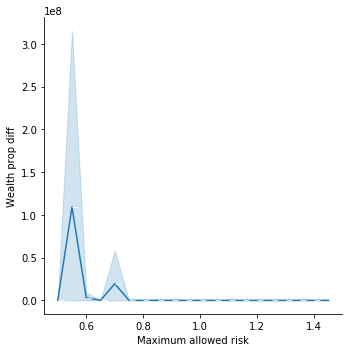

In [11]:
fig = sns.relplot(x='Max Risk', y='Wealth prop diff',
                   kind="line",
                  data=nyse_data, marker=True,)
plt.xlabel('Maximum allowed risk')
plt.ylim()
# plt.savefig('plots/ratio_wealth_vs_risk.png')

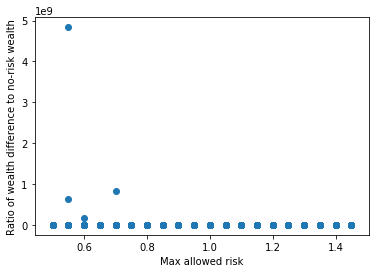

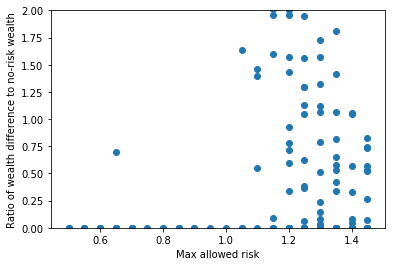

In [12]:
x = nyse_data['Max Risk']
y = nyse_data['Wealth prop diff']

plt.scatter(x, y)
plt.xlabel('Max allowed risk')
plt.ylabel('Ratio of wealth difference to no-risk wealth')
plt.show()

plt.scatter(x, y)
plt.ylim(0, 2)
plt.xlabel('Max allowed risk')
plt.ylabel('Ratio of wealth difference to no-risk wealth')
plt.show()

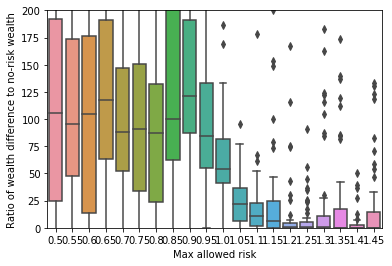

In [13]:
ax = sns.boxplot(data=nyse_data, x='Max Risk', y='Wealth prop diff')
plt.ylim(0, 200)
plt.xlabel('Max allowed risk')
plt.ylabel('Ratio of wealth difference to no-risk wealth')
plt.savefig('plots/ratio_wealth_vs_risk.png')
# plt.xticks(np.arange(0.5, 1.5, step=0.2))

Across all parameters at low levels of allowed risk, the rejection strategy showed higher returns, both absolutely and relative to the size of welath aggregated. At higher allowed risk ,the wealth appread to dissipate to 25-50% of its non-risk limited value.

## 2.3 NYSE High-performing results

In [14]:
nyse_high = nyse_data[nyse_data['No Risk Wealth'] >27.08]
nyse_high.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,100.695652,0.136646,0.001385,1.041615,0.967081,36.694587,37.987432,-1.292845,-1.768406
std,78.754130,0.059097,0.001574,0.327978,0.313753,11.257352,7.062534,11.120878,29.489915
min,21.000000,0.050000,0.000000,0.400000,0.500000,24.846579,27.092245,-21.764197,-44.935133
25%,42.000000,0.100000,0.000000,0.800000,0.700000,26.670504,32.625493,-7.628943,-20.362803
50%,63.000000,0.150000,0.001000,1.100000,0.950000,33.477808,37.250088,-1.547932,-4.159372
75%,126.000000,0.150000,0.002500,1.300000,1.250000,42.089986,44.042526,3.233995,9.200961
max,252.000000,0.250000,0.005000,1.500000,1.450000,87.364952,53.730133,45.527115,162.622638


Text(0.5,1,'Impact of a maximal risk allowance on high-performing metrics of portfolio optimization')

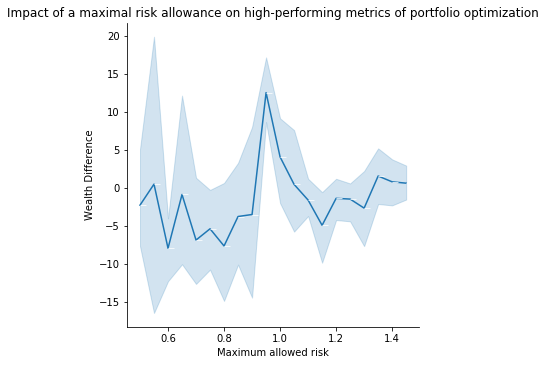

In [15]:
fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=nyse_high, marker=True,)
plt.xlabel('Maximum allowed risk')
plt.title('Impact of a maximal risk allowance on high-performing metrics of portfolio optimization')

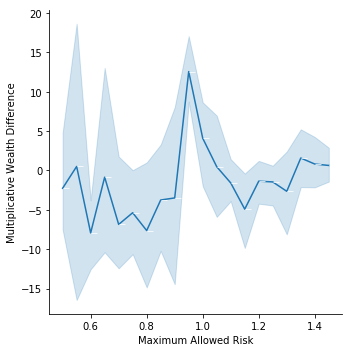

In [16]:
fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=nyse_high, marker=True,)
plt.xlabel("Maximum Allowed Risk")
plt.ylabel("Multiplicative Wealth Difference")
plt.savefig('plots/wealth_vs_risk.png')

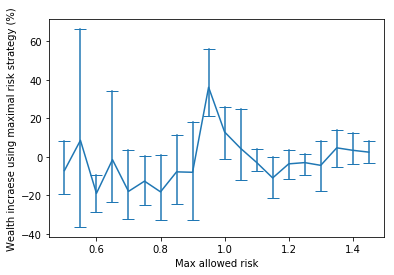

In [17]:
ax = sns.lineplot(data=nyse_high, x='Max Risk', err_style="bars", y='Wealth prop diff')
plt.xlabel('Max allowed risk')
plt.ylabel('Wealth incraese using maximal risk strategy (%)')
plt.savefig('plots/risk_improvement_percentage.png')

/Users/pidaparti/.miniconda3/envs/portfolio-research/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/pidaparti/.miniconda3/envs/portfolio-research/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Natural log wealth gain')

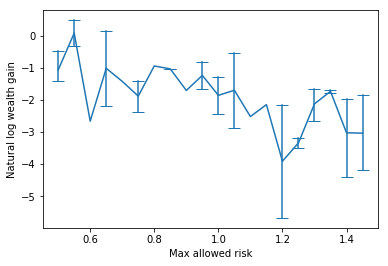

In [18]:
nyse_high['Ln of proportional gain'] = np.log(nyse_high['Wealth prop diff'] / 100)
ax = sns.lineplot(data=nyse_high, x='Max Risk', err_style="bars", y='Ln of proportional gain')
# plt.ylim(-50, 300)
plt.xlabel('Max allowed risk')
plt.ylabel('Natural log wealth gain')

Even at the upper end, the algorithms only improves with risky portfolios not being allowed.

In [19]:
beta_ranges = nyse_high['Beta Range'].unique(); beta_ranges

array([ 42.,  63.,  21., 126., 252.])

42.0
63.0
21.0
126.0
252.0


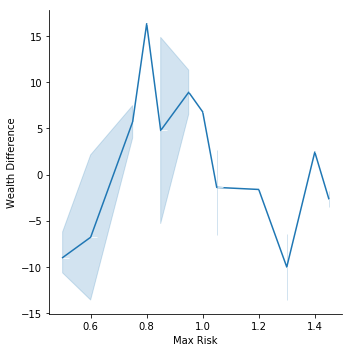

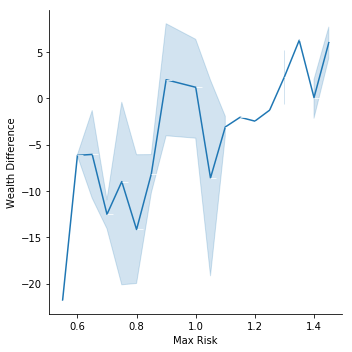

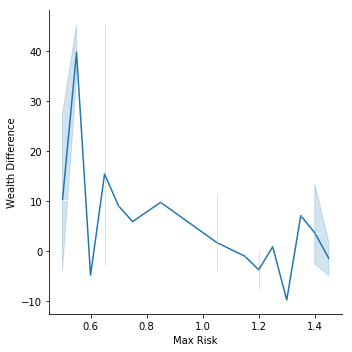

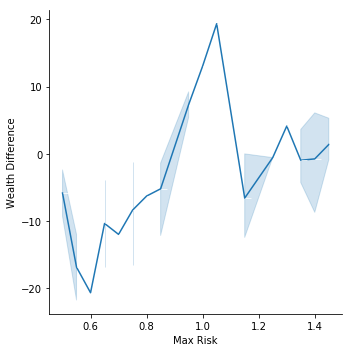

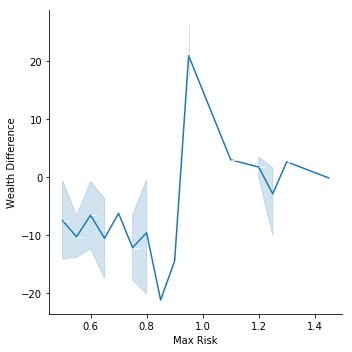

In [20]:
for br in beta_ranges:
    br_data = nyse_high[nyse_high['Beta Range'] == br]
    fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=br_data , marker=True,)
    plt.plot()
    print(br)

In [21]:
d = {21.:1, 42.:2, 63.:3, 126.:6, 252.:12}

nyse_high_mod = nyse_high.copy()
nyse_high_mod['Beta Range'] = nyse_high['Beta Range'].map(lambda x: d[x])

Text(0.5,0,'Beta Range (months)')

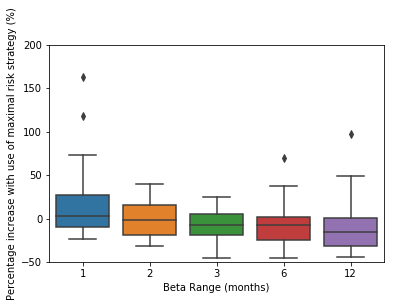

In [34]:
# fig = sns.relplot(x='Beta Range', y='Wealth prop diff',
# #                    kind="line",
#                   data=nyse_high , marker=True,)
ax = sns.boxplot(data=nyse_high_mod, x='Beta Range', y='Wealth prop diff', whis=1.5)
plt.ylim(-50, 200)
plt.ylabel('Percentage increase with use of maximal risk strategy (%)')
plt.xlabel('Beta Range (months)')
# plt.savefig('plots/beta_range_nyse.png')

In [23]:
nyse_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03
mean,101.067273,0.203045,0.003646,0.771455,0.974727,23.240022,1.666299e+01,6.577029e+00,5.874941e+06
std,81.697967,0.128961,0.003530,0.457933,0.289351,11.329711,1.095889e+01,9.767410e+00,1.492137e+08
min,21.000000,0.000000,0.000000,0.000000,0.500000,0.000140,1.888940e-07,-2.176420e+01,-4.493513e+01
25%,42.000000,0.100000,0.001000,0.400000,0.750000,15.051585,1.084368e+01,7.552359e-11,2.831727e-10
50%,63.000000,0.200000,0.002500,0.800000,1.000000,26.598582,1.416210e+01,4.203695e+00,3.649187e+01
75%,126.000000,0.300000,0.005000,1.200000,1.250000,26.749613,2.021331e+01,1.302029e+01,1.127740e+02
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+09


## 2.4 S&P results

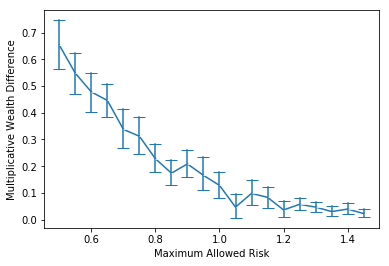

In [24]:
matplotlib.rcParams.update({'errorbar.capsize': 6})
fig = sns.lineplot(x='Max Risk', y='Wealth Difference',
                   err_style="bars",
                  data=sp500_data, marker=True,)
plt.xlabel("Maximum Allowed Risk")
plt.ylabel("Multiplicative Wealth Difference")
plt.savefig('plots/wealth_vs_risk_sp500.png')

In [25]:
sp500_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.074000e+03
mean,97.037823,0.585055,0.003895,19.761993,0.985240,0.521378,0.319335,0.202043,4.372572e+03
std,82.035966,0.951928,0.003599,6.836610,0.288473,0.470226,0.378558,0.269429,5.540187e+04
min,21.000000,0.000000,0.000000,8.000000,0.500000,0.000000,0.000000,-0.324815,-4.094607e-01
25%,42.000000,0.100000,0.001000,14.000000,0.750000,0.080535,0.004250,0.015475,2.876941e-01
50%,63.000000,0.200000,0.002500,20.000000,1.000000,0.423069,0.162051,0.092154,1.344061e+00
75%,126.000000,0.300000,0.005000,26.000000,1.250000,0.824766,0.611134,0.310706,9.091496e+00
max,252.000000,3.900000,0.010000,31.000000,1.450000,2.365258,1.420987,1.767166,1.378616e+06


## 2.5 High performing S&P results

In [26]:
sp500_high = sp500_data[sp500_data['No Risk Wealth'] > 1.64]
sp500_high.head()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff


Text(6.8,0.5,'Multiplicative Wealth Difference')

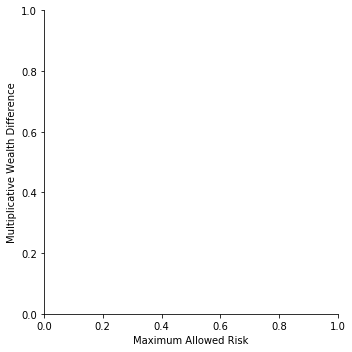

In [27]:
fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=sp500_high, marker=True,)
plt.xlabel("Maximum Allowed Risk")
plt.ylabel("Multiplicative Wealth Difference")
# plt.savefig('plots/wealth_vs_risk.png')

In [28]:
ax = sns.boxplot(data=sp500_high, x='Max Risk', y='Wealth prop diff')
# plt.ylim(0, 200)
plt.xlabel('Max allowed risk')
plt.ylabel('Wealth incraese using maximal risk strategy (%)')

ValueError: min() arg is an empty sequence